<a href="https://colab.research.google.com/github/Ryan-spec/Portfolio-Projects/blob/master/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classifying Images Using Machine Learning**

---



---



In [1]:
# Import the libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers 
from keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [2]:
# Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
# Look at the data types of the variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
# Get the shape of the arrays
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [5]:
# Look at the first image as an array
index = 0
x_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

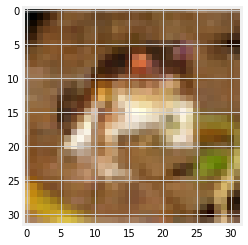

In [6]:
# View the image as a picture
img = plt.imshow(x_train[index])

In [7]:
# Get the image label
print('The image label is:', y_train[index])

The image label is: [6]


In [8]:
# Get the image classification 
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Print the image class
print('The image class is:', classification[y_train[index][0]])

The image class is: frog


In [9]:
# Prepare the data for the neural network
# Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [10]:
# Print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [11]:
# Print the new label of the image above
print('The one hot label is:', y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [12]:
# Normalize the pixels to be values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [13]:
x_train[index]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [14]:
# Create the models architecture
model = Sequential()

# Add the first layer 
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))

# Add a pooling layer 
model.add(MaxPooling2D(pool_size=(2,2)))

# Add another convolution layer
model.add(Conv2D(32, (5,5), activation='relu'))

# Add another pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add a flattening layer
model.add(Flatten())

# Add a layer with a 1000 neurons
model.add(Dense(1000, activation='relu'))

# Add a dropout layer
model.add(Dropout(0.5)) 

# Add a layer with a 500 neurons
model.add(Dense(500, activation='relu'))

# Add a dropout layer
model.add(Dropout(0.5)) 

# Add a layer with a 250 neurons
model.add(Dense(250, activation='relu'))

# Add a layer with a 10 neurons
model.add(Dense(10, activation='softmax'))

In [15]:
# Compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])


In [16]:
# Train the model 
hist = model.fit(x_train, y_train_one_hot,
                 batch_size= 256,
                 epochs = 10,
                 validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 59s 1ms/step - loss: 1.7883 - accuracy: 0.3322 - val_loss: 1.4659 - val_accuracy: 0.4577
Epoch 2/10
40000/40000 [==============================] - 57s 1ms/step - loss: 1.4002 - accuracy: 0.4894 - val_loss: 1.2580 - val_accuracy: 0.5544
Epoch 3/10
40000/40000 [==============================] - 57s 1ms/step - loss: 1.2521 - accuracy: 0.5501 - val_loss: 1.2366 - val_accuracy: 0.5546
Epoch 4/10
40000/40000 [==============================] - 57s 1ms/step - loss: 1.1456 - accuracy: 0.5897 - val_loss: 1.1274 - val_accuracy: 0.5944
Epoch 5/10
40000/40000 [==============================] - 57s 1ms/step - loss: 1.0535 - accuracy: 0.6293 - val_loss: 1.0081 - val_accuracy: 0.6459
Epoch 6/10
40000/40000 [==============================] - 57s 1ms/step - loss: 0.9881 - accuracy: 0.6504 - val_loss: 1.0111 - val_accuracy: 0.6459
Epoch 7/10
40000/40000 [==============================] - 57s 1ms/st

In [17]:
# Evaluate the model using the test data set
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 5s 497us/step


0.6794999837875366

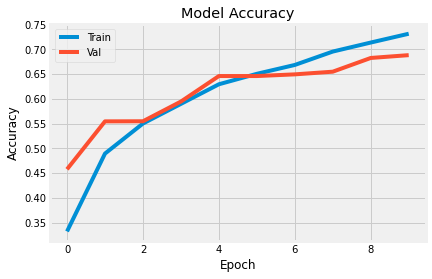

In [19]:
# Visualize the model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

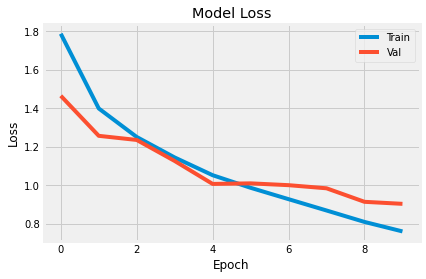

In [20]:
# Visualize the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [29]:
# Test the model 
from google.colab import files
uploaded = files.upload()

Saving Thinking-of-getting-a-cat.png to Thinking-of-getting-a-cat.png


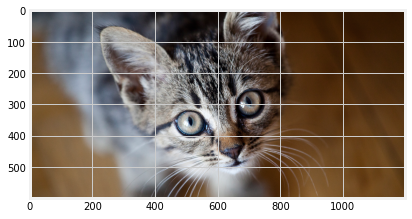

In [31]:
# Show the image
new_image = plt.imread('Thinking-of-getting-a-cat.png')
img = plt.imshow(new_image)

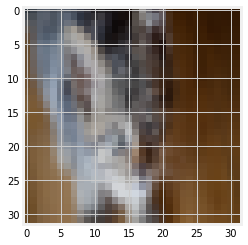

In [32]:
# Resize the image 
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [33]:
# See if the model can predict the image
predictions = model.predict(np.array([resized_image]))
predictions

array([[7.7321823e-03, 1.8608427e-04, 2.7440289e-01, 5.6643277e-01,
        1.7200788e-02, 9.4647571e-02, 7.8438073e-03, 2.8421797e-02,
        2.2212414e-03, 9.1086345e-04]], dtype=float32)

In [34]:
# Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# Show the sorted labels in order
print(list_index)

[3, 2, 5, 7, 4, 6, 0, 8, 9, 1]


In [35]:
# print the first 5 predictions 
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]]* 100, 2), '%')

cat : 56.64 %
bird : 27.44 %
dog : 9.46 %
horse : 2.84 %
deer : 1.72 %


The model predicted poorly for the first uploaded image so upon changing the image, the model has predicted rather decently on the second try.